**Общая информация**

**Срок сдачи:** 13 марта 2017, 06:00 <br\>
**Штраф за опоздание:** -2 балла после 06:00 13 марта, -4 балла после 06:00 20 марта, -6 баллов после 06:00 27 марта

При отправлении ДЗ указывайте фамилию в названии файла
Присылать ДЗ необходимо в виде ссылки на свой github репозиторий в slack @alkhamush

Необходимо в slack создать таск в приватный чат:
/todo Фамилия Имя ссылка на гитхаб @alkhamush
Пример:
/todo Ксения Стройкова https://github.com/stroykova/spheremailru/stroykova_hw1.ipynb @alkhamush

Используйте данный Ipython Notebook при оформлении домашнего задания.

###### Задание 1 (2 баллов)
Реализовать KNN в классе MyKNeighborsClassifier (обязательное условие: точность не ниже sklearn реализации)

###### Задание 2 (2 балла)
Добиться скорости работы на fit,  predict и predict_proba сравнимой со sklearn 4 балла для iris и mnist
Для этого используем numpy

###### Задание 3 (2 балла)
Для iris найдите такой параметр n_neighbors, при котором выдаётся наилучший score. Нарисуйте график зависимости score от n_neighbors

###### Задание 3 (2 балла)
Выполнить требования pep8

###### Задание 5 (2 балла)
Описать для чего нужны следующие библиотеки/классы/функции (список будет ниже)


In [5]:
import numpy as np
import matplotlib.pyplot as plt

import seaborn as sns
from sklearn import datasets
from sklearn.base import ClassifierMixin
from sklearn.datasets import fetch_mldata
from sklearn.neighbors.base import NeighborsBase, KNeighborsMixin, SupervisedIntegerMixin 
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

In [6]:
class MyKNeighborsClassifier(NeighborsBase, KNeighborsMixin, SupervisedIntegerMixin, ClassifierMixin):
    def __init__(self, n_neighbors=3):
        self._k = n_neighbors

    def fit(self, X, y):
        if y.shape[0] != X.shape[0]:
            print "wrong number of marks : y_train != X_train"
        if X.shape[0] < 2:
            print "fit with one element..."
        XX = np.array(X, dtype=float)
        self.X_ = XX
        self.y_ = y
        self.classes_ = np.unique(y)
        self.n_samples = XX.shape[0]
        self.n_features = XX.shape[1]

    @staticmethod
    def numpy_dist(X, Y):
        x_dist = (X ** 2).sum(axis=1)
        y_dist = (Y ** 2).sum(axis=1)
        xy_dist = X.dot(Y.T)
        dist = - 2 * xy_dist + y_dist + x_dist.reshape(-1, 1)
        return np.sqrt(dist)

    def _predict(self, X):
        rez = np.zeros(np.shape(X)[0], dtype=int)
        a = MyKNeighborsClassifier.numpy_dist(X, self.X_)
        yks = np.argpartition(a, self._k - 1, axis=1)[:, :self._k]
        for j in range(np.shape(X)[0]):
            un, cts = np.unique(self.y_[yks[j, :]], return_counts=True)
            rez[j] = un[np.argsort(cts)][-1]
        return rez

    def predict(self, X):
        separator = 200
        rez = np.zeros(X.shape[0])
        for i in range(np.ceil(X.shape[0] / float(separator)).astype(int)):
            XX = X[i * separator:(i + 1) * separator, :].astype(float)
            rez[i * separator:(i + 1) * separator] = self._predict(XX)
        return rez

    def _predict_proba(self, X):
        rez = np.zeros([np.shape(X)[0], self.classes_.shape[0]], dtype=float)
        a = MyKNeighborsClassifier.numpy_dist(X, self.X_)
        yks = np.argpartition(a, self._k - 1, axis=1)[:, :self._k]
        # print yks
        for j in range(np.shape(X)[0]):
            un, cts = np.unique(self.y_[yks[j, :]], return_counts=True)
            cts = cts.astype(float)
            un = un.astype(int)
            rez[j, un] = cts / self._k

        return rez

    def predict_proba(self, X):
        separator = 200
        rez = np.zeros([np.shape(X)[0], self.classes_.shape[0]], dtype=float)

        for i in range(np.ceil(X.shape[0] / float(separator)).astype(int)):
            XX = X[i * separator:(i + 1) * separator, :].astype(float)
            rez[i * separator:(i + 1) * separator, :] = self._predict_proba(XX)
        return rez

    def score(self, X, y):
        return np.mean(self.predict(X) == y)

**IRIS**

In [7]:
iris = datasets.load_iris()

In [8]:
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.1, stratify=iris.target)

In [9]:
clf = KNeighborsClassifier(n_neighbors=2)
my_clf = MyKNeighborsClassifier(n_neighbors=2)

In [10]:
%time clf.fit(X_train, y_train)

Wall time: 2 ms


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=2, p=2,
           weights='uniform')

In [11]:
%time my_clf.fit(X_train, y_train)

Wall time: 0 ns


In [12]:
%time clf.predict(X_test)

Wall time: 7 ms


array([2, 1, 1, 0, 2, 1, 2, 2, 1, 2, 0, 1, 0, 0, 0])

In [13]:
%time my_clf.predict(X_test)


Wall time: 32 ms


array([ 2.,  1.,  1.,  0.,  2.,  1.,  2.,  2.,  1.,  2.,  0.,  1.,  0.,
        0.,  0.])

In [14]:
%time c=clf.predict_proba(X_test)
c

Wall time: 5 ms


array([[ 0.,  0.,  1.],
       [ 0.,  1.,  0.],
       [ 0.,  1.,  0.],
       [ 1.,  0.,  0.],
       [ 0.,  0.,  1.],
       [ 0.,  1.,  0.],
       [ 0.,  0.,  1.],
       [ 0.,  0.,  1.],
       [ 0.,  1.,  0.],
       [ 0.,  0.,  1.],
       [ 1.,  0.,  0.],
       [ 0.,  1.,  0.],
       [ 1.,  0.,  0.],
       [ 1.,  0.,  0.],
       [ 1.,  0.,  0.]])

In [15]:
%time cc=my_clf.predict_proba(X_test)
cc

Wall time: 1 ms


array([[ 0.,  0.,  1.],
       [ 0.,  1.,  0.],
       [ 0.,  1.,  0.],
       [ 1.,  0.,  0.],
       [ 0.,  0.,  1.],
       [ 0.,  1.,  0.],
       [ 0.,  0.,  1.],
       [ 0.,  0.,  1.],
       [ 0.,  1.,  0.],
       [ 0.,  0.,  1.],
       [ 1.,  0.,  0.],
       [ 0.,  1.,  0.],
       [ 1.,  0.,  0.],
       [ 1.,  0.,  0.],
       [ 1.,  0.,  0.]])

In [16]:
clf.score(X_test, y_test)

0.8666666666666667

In [17]:
my_clf.score(X_test, y_test)

0.8666666666666667

In [18]:
# Задание 3
n = 25
import matplotlib.pyplot as plt
c = np.zeros([2000, n-1])
k = range(1, n)
for j in range(2000):
    iris = datasets.load_iris()
    X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.1, stratify=iris.target)
    for i in k:
        clf = KNeighborsClassifier(n_neighbors=i)
        clf.fit(X_train, y_train)
        c[j, i-1] = clf.score(X_test, y_test)
    a = c.mean(axis=0)
plt.plot(k, a, color='blue', label='SKlearn score')
plt.legend()


In [19]:
a.argmax()

16

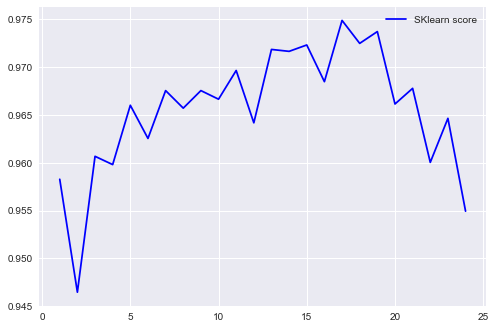

In [20]:
plt.show()

**MNIST**

In [21]:
mnist = fetch_mldata('MNIST original')

In [22]:
X_train, X_test, y_train, y_test = train_test_split(mnist.data, mnist.target, test_size=0.1, stratify=mnist.target)

In [23]:
clf = KNeighborsClassifier(n_neighbors=2)
my_clf = MyKNeighborsClassifier(n_neighbors=2)

In [24]:
%time clf.fit(X_train, y_train)

Wall time: 48.9 s


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=2, p=2,
           weights='uniform')

In [25]:
%time my_clf.fit(X_train, y_train)

Wall time: 287 ms


In [26]:
%time clf.predict(X_test)

Wall time: 13min 50s


array([ 0.,  1.,  0., ...,  6.,  0.,  0.])

In [ ]:
%time my_clf.predict(X_test)

Wall time: 1min 31s


array([ 0.,  1.,  0., ...,  6.,  0.,  0.])

In [ ]:
%time clf.predict_proba(X_test)

In [ ]:
%time my_clf.predict_proba(X_test)

In [ ]:
clf.score(X_test, y_test)

In [ ]:
my_clf.score(X_test, y_test)

Задание 5

In [ ]:
# seaborn - это библиотека для создания привлекательной и информативной статистической графики
# matplotlib - построение графиков 
# train_test_split - инструмент для разделения массива данных на случайные обучающую и тестовую части
# Pipeline (from sklearn.pipeline import Pipeline) - класс, инструмент для инкапсуляции нескольких разных трансформаторов вместе с оценкой в один объект 
# StandardScaler (from sklearn.preprocessing import StandardScaler) - класс, преобразует данные таким образом, что их распределение будет иметь среднее значение 0 и стандартное отклонение 1.
# ClassifierMixin - Mixin класс, добавляемый к списку классов от которых наследуется создаваемые классификаторы
# NeighborsBase - базовый класс, предок классов-классификаторов KNN
# KNeighborsMixin - класс, расширающий возможности NeighborsBase: добавляет две функции kneighbors и kneighbors_grap
# SupervisedIntegerMixin - Mixin класс, добавляющий метод fit, позволяющий обучить классификатор, используя тренировочные данные X и целевую переменную y